In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
transportation_data_complete = pd.merge(city_data, ride_data, on=["city"])

In [2]:
# Display the data table for preview
transportation_data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

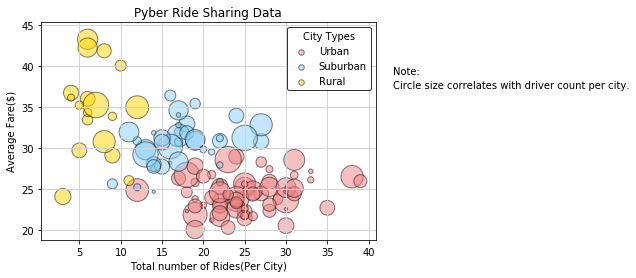

In [3]:
#Average Fare Per City
average_fare = transportation_data_complete.groupby("city")["fare"].mean()
average_fare = pd.DataFrame(average_fare).reset_index()
average_fare = average_fare.rename(columns = {'fare': 'avg_fare'})
#Total Number of Rides Per City
total_rides = transportation_data_complete.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns = {'ride_id': 'total_rides'})
#Total Drivers
total_drivers = transportation_data_complete[["city", "driver_count"]].drop_duplicates("city")
#City Type
city_type = transportation_data_complete[["city", "type"]].drop_duplicates("city")
final_df = pd.merge(pd.merge(pd.merge(average_fare, total_rides, on="city"), 
                             total_drivers, on="city"), city_type, on="city")

#Bubble Plot Data
urban_group = final_df.loc[final_df['type'] == 'Urban']
suburban_group = final_df.loc[final_df['type'] == 'Suburban']
rural_group = final_df.loc[final_df['type'] == 'Rural']

#Bubble Plot
ax1 = urban_group.plot(kind='scatter',x='total_rides', y='avg_fare',
                       color='lightcoral', s=final_df['driver_count']*10, label = 'Urban', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1)    
ax2 = suburban_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                          color='lightskyblue',s=final_df['driver_count']*10, label = 'Suburban', 
                          alpha = 0.5, edgecolor = "black", linewidths = 1,ax=ax1)    
ax3 = rural_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                       color='gold', s=final_df['driver_count']*10, label = 'Rural', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1,ax=ax1)

#Creates a grid
plt.grid(color='lightgray', linestyle='-', linewidth=1)

#legend,best location, size of 30 otherwise bubble size changes
lgnd = plt.legend(frameon = True, edgecolor = 'black', title='City Types', loc="best")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.xlabel("Total number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data")
# Adding note on right hand side
textstr = ('Note:')
plt.text(.94, 0.7, textstr, fontsize=10, transform=plt.gcf().transFigure)
textstr = ('Circle size correlates with driver count per city.')
plt.text(.94, 0.65, textstr, fontsize=10, transform=plt.gcf().transFigure)
# Save Figure, bbox added so note was not cutoff
plt.savefig("PyberCityRideScatter.png", bbox_inches="tight")
#Show
plt.show()

## Total Fares by City Type

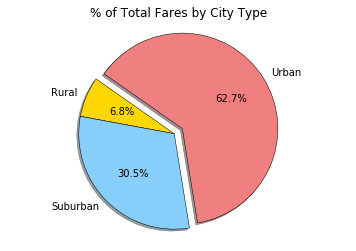

In [4]:
#group by type to be used by all pie charts
by_type = transportation_data_complete.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build lables
labels = fare_sum.index

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

#Explodes the "Rural" and "Suburban" areas from "Urban"
explode = [0 , 0, .1]

#Creates Pie
plt.pie(fare_sum, startangle = 145, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
# Save Figure
plt.savefig("PyberFareCityType.png")
#Show Plot
plt.show()

## Total Rides by City Type

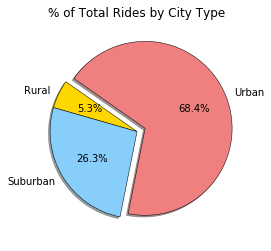

In [5]:
#counts ride_id
ride_sum = by_type.count()['ride_id']

#Creates labels from count of Ride_ID
labels = ride_sum.index

# Tells matplotlib to seperate the "Rural & Urban" section from Urban
explode = (0, 0, 0.1)

# The colors of each section of the pie chart
colors =["gold","lightskyblue","lightcoral"]

labels = ride_sum.index
plt.pie(ride_sum, startangle = 145, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("PyberTotalRideType.png")
#Show
plt.show()

## Total Drivers by City Type

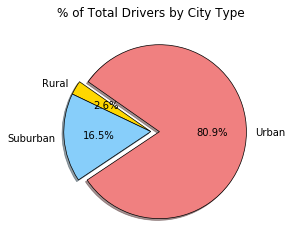

In [6]:
#total number of drivers per city, sums the driver count
drivers = city_data.groupby(['type'])['driver_count'].sum()

# Tells matplotlib to seperate the "Rural and Suburban" section from "Urban"
explode = (0, 0, 0.1)

# Labels for the sections of this pie chart
labels=drivers.index

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue",  "lightcoral"]

#Pie display
plt.pie(drivers, startangle = 145, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .7, 'edgecolor': 'black'})

#Adds a title
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("PyberTotalDriversType.png")
#Show
plt.show()